<img style="float: left;" src="Lecture/Slide1.PNG" width="100%">

<img style="float: left;" src="Lecture/Slide2.PNG" width="100%">

<img style="float: left;" src="Lecture/Slide3.PNG" width="100%">

<img style="float: left;" src="Lecture/Slide4.PNG" width="100%">

## <span style="color:red">Exercise 1: Geothermal production</span>

## Consider geothermal production from reservoir filled with water:
 * Depth of reservoir: 2000 m
 * Tickness of reservoir: 80 m
 * Porosity: 20%
 * Well separation is 800 m 
 * Energy production 0.1PJ per year
 * Permeability 50 mDarcy
 * Injection temperature T = 20 C
 * Well radius r = 0.15 m

#### 1. Evaluate how long will work geothermal doublet assuming it drains ~400 m of reservoir 

#### 2. How much electric energy it needs yearly with pump efficiency 40%?


In [3]:
# 1 PJ = 1e12 kJ
from math import pi
import numpy as np

h = 80
k = 50e-15
phi = 0.20
 
temp_inj = 20
rho_w = 975 # kg/m3
rho_r = 2500 # kg/m3
C_w = 4   # kJ/kg/C
C_r = 0.8532  # kJ/kg/C

mu = 8.9e-4
rw = 0.15   # m

nu = 0.4

day2sec = 86400
energy_per_year = 0.1 * 1e15 # PJ to J

T_ini = 75 # or you can calculate based on the thermal gradient

l = 800  # well distance

dt = 1 * 365 * day2sec


E = rho_w * C_w * (T_ini - temp_inj)  # energy production KJ/m3

Q = (energy_per_year / 365) / (E * 1e3)  # well rate m3/day

WI = 2 * pi * k * h / (mu * np.log(l / (2 * rw)))

A = l / 2 # assumption of the half of the lenght 400m

v = (rho_w * C_w * Q) / (rho_r * C_r * (1 - phi) * A) # velocity m/day

lt = l / v / 365 # in years

dp = Q / WI / day2sec # pressure drop in kPa

Ep =  Q * dp / nu # pumpimg energy in KJ/sec
convert = day2sec * 365 * 1e-12 # KJ/sec to PJ/year

print('   Velocity = ' + str(v)  + ' m/day')
print('   Lifetime = ' + str(lt) + ' years')
print('       Rate = ' + str(Q)  + ' m3/day')
print('Pump energy = ' + str(Ep*convert) + ' PJ')

   Velocity = 7.297995853570677 m/day
   Lifetime = 0.30032639999999994 years
       Rate = 1277.261551234154 m3/day
Pump energy = 415854.8604438905 PJ


<img style="float: left;" src="Lecture/Slide13.PNG" width="100%">

<img style="float: left;" src="Lecture/Slide14.PNG" width="100%">

<img style="float: left;" src="Lecture/Slide15.PNG" width="100%">

<img style="float: left;" src="Lecture/Slide5.PNG" width="100%">

<img style="float: left;" src="Lecture/Slide6.PNG" width="100%">

<img style="float: left;" src="Lecture/Slide7.PNG" width="100%">

<img style="float: left;" src="Lecture/Slide8.PNG" width="100%">

<img style="float: left;" src="Lecture/Slide9.PNG" width="100%">

<img style="float: left;" src="Lecture/Slide10.PNG" width="100%">

<img style="float: left;" src="Lecture/Slide11.PNG" width="100%">

<img style="float: left;" src="Lecture/Slide12.PNG" width="100%">

## <span style="color:red">Exercise 2: Well test interpretation</span>

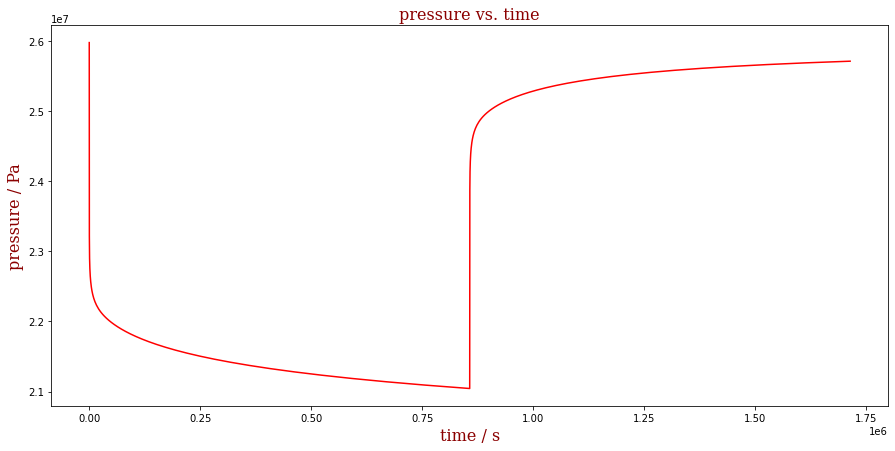

In [4]:
# import the packages we need in this exercise
import numpy as np
from math import pi, e
import matplotlib.pyplot as plt

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

# Additional measured data
B   = 1.0         # volume factor, V_res/V_surf
mu  = 1           # viscosity, unit: cp
comp= 1e-10       # compressibility , 1/Pa
h   = 75          # thickness, unit: m
q   = 600         # rate, unit: m3/d
rw  = 0.1         # well radius, unit: m

# convert unit to SI unit
mu  = mu / 1000
q   = q / day2sec

# load pressure and time data from the .txt file and plot pressure vs time
pressure = np.genfromtxt('pressure.txt')
time = np.genfromtxt('time.txt')
plt.figure(figsize=(15, 7))
plt.plot(time, pressure,'r')
plt.title('pressure vs. time', fontdict=font)
plt.xlabel('time / s', fontdict=font)
plt.ylabel('pressure / Pa', fontdict=font)
plt.show()

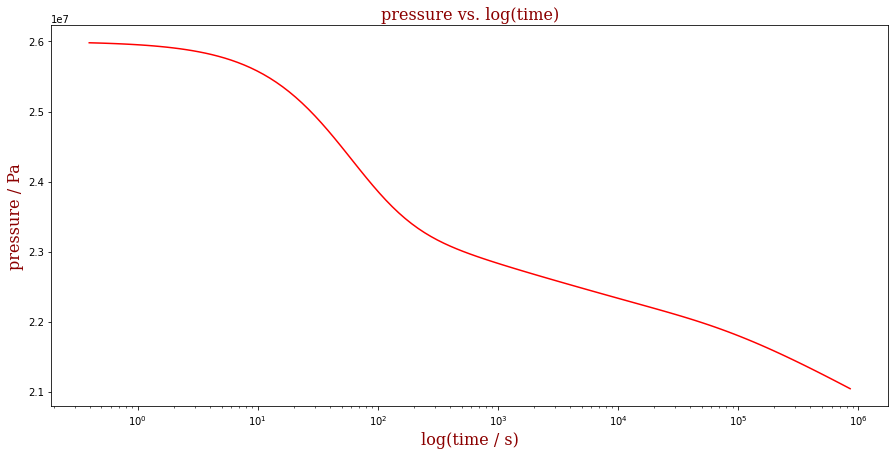

In [9]:
# step 1: find when the pressure starts to build up

for i in range(len(pressure)):
    if pressure[i+1] > [pressure[i]]:
        break
        
pressure_drop = pressure[:i+1]
pressure_build = pressure[i+1:]
ind = i

plt.figure(figsize=(15, 7))
plt.semilogx(time[:ind+1], pressure_drop,'r')
plt.title('pressure vs. log(time)', fontdict=font)
plt.xlabel('log(time / s)', fontdict=font)
plt.ylabel('pressure / Pa', fontdict=font)
plt.show()

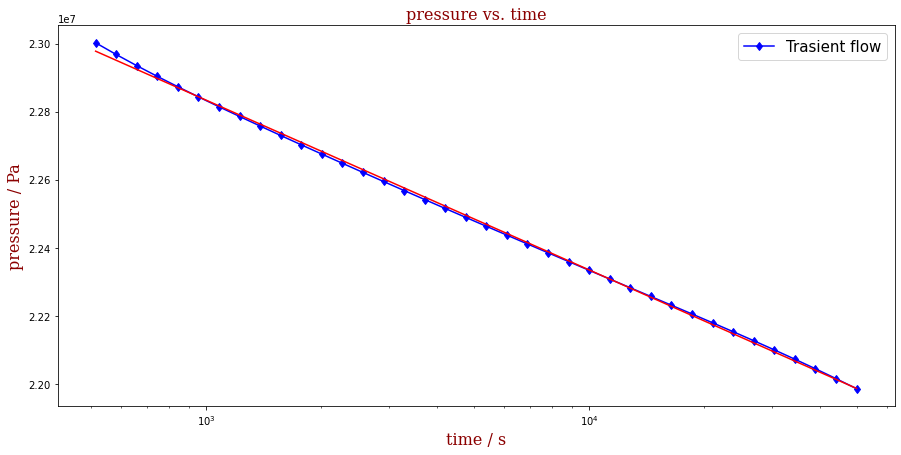

Permeability = 34.03949404715647 mDarcy


In [15]:
# Step 2: from the pressure drawdown curve to distinguish the flow regimes
# from the curve, we can find, from 500 s, it's already a straight line, which means it's transient flow. 
# Before that, it's the effect of wellbore storage. And after 50000s, pressure starts to decrease quickly. 
# This is the late transient flow now from the time table, we can find the index of these two time points 
# then linear regression for transient flow using least square

for i in range(len(time)):
    if time[i] > 500:
        break
ind_start = i

for i in range(len(time)):
    if time[i] > 50000:
        break
ind_end = i

# transient flow 
P = pressure[ind_start:ind_end]
T = time[ind_start:ind_end]

num_coef = 2 # P = m*en(t) + e
num_points = len(P)

# Now regress data to line
A = np.zeros((num_points, 2))
A[:, 0] = np.ones((num_points, ))
for i in range(num_points):
    A[i, 1] = np.log(T[i])

solution = np.linalg.solve(np.dot(A.T, A), np.dot(A.T, P))

pressure_fit = np.zeros((num_points))
for i in range(num_points):
    pressure_fit[i] = solution[0] + solution[1] * np.log(T[i])


# visualize the results
plt.figure(figsize=(15, 7))
plt.semilogx(time[ind_start:ind_end], P, 'bd-')
plt.semilogx(T,pressure_fit,'r')
plt.legend(['Trasient flow'],fontsize = 15)
plt.title('pressure vs. time', fontdict=font)
plt.xlabel('time / s', fontdict=font)
plt.ylabel('pressure / Pa', fontdict=font)
plt.show()

# calculate permeability from pw = -mlnt + const

k = -1e15 * q * B * mu / (4 * pi * h * solution[1])

print("Permeability = "+str(k)+" mDarcy")
